In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 14px;
</style>

In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import tikzplotlib

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ['epynet', 'attacks']
what = 'attacks'

In [4]:
folder = 'to_load/'

attacks_file = 'attack_0'
epynet_file = 'long_0'

if what == 'epynet':
    filename = epynet_file
elif what == 'attacks':
    filename = attacks_file
else:
    raise Exception("'what' has not a correct category")

with open(folder + filename, mode='rb') as file:
    res = pickle.load(file)

In [5]:
def print_results_summary(results):
    """
    Print together the principal saved results
    """
    print("---------------------------------------------------------------------------------")
    print("RESULTS SUMMARY:")
    print("---------------------------------------------------------------------------------")
    seeds = [results['eval'][i]['seed'] for i in range(len(results['eval']))]
    DSRs = [results['eval'][i]['dsr'] for i in range(len(results['eval']))]
    updates = [results['eval'][i]['updates'] for i in range(len(results['eval']))]
    
    if what == 'attacks':
        train_attacks = [results['train'][i]['attacks'] for i in range(len(results['train']))]
        eval_attacks = [results['eval'][i]['attacks'] for i in range(len(results['eval']))]
    
    print("SEEDS: ", seeds)
    print("DSRs: ", DSRs)
    print("UPDATES: ", updates)
    
    if what == 'attacks':   
        print("ATTACKS IN TRAIN:")
        print_attacks(train_attacks)
        print("\n")
            
        print("ATTACKS IN TEST:")
        print_attacks(eval_attacks)
    print("---------------------------------------------------------------------------------")
    

def print_attacks(attacks):
    """
    Handle the format of attacks prints
    """
    for i, attack in enumerate(attacks):
        print("Episode {}:".format(i))
        if attack:
            for sub in attack:
                print('\tname: ', sub['name'])
                print("\ttype: ", sub['type'])
                print("\ttarget: ", sub['target'])
                print("\ttrigger", sub['trigger'])
                print("\ttags", sub['tags'])        
        else:
            print("\t[]")

In [6]:
print_results_summary(res)

---------------------------------------------------------------------------------
RESULTS SUMMARY:
---------------------------------------------------------------------------------


KeyError: 'attacks'

In [ ]:
model = res['eval']

In [ ]:
for seed in range(len(model)):
    print(len(model[seed]['dataset']['reward']))

In [ ]:
model = res['eval']

fig, axs = plt.subplots(4, 1, figsize=(20,10), sharex=True)

for seed in range(len(model)):
    rewards = model[seed]['dataset']['reward']
    xvalues = [model[seed]['dataset']['current_state'][step][0] * model[seed]['dataset']['current_state'][step][1] for step in range(len(model[seed]['dataset']['current_state']))]
    
    axs[seed].plot(rewards, label="seed_" + str(seed))
    axs[seed].legend()

NameError: name 'model' is not defined

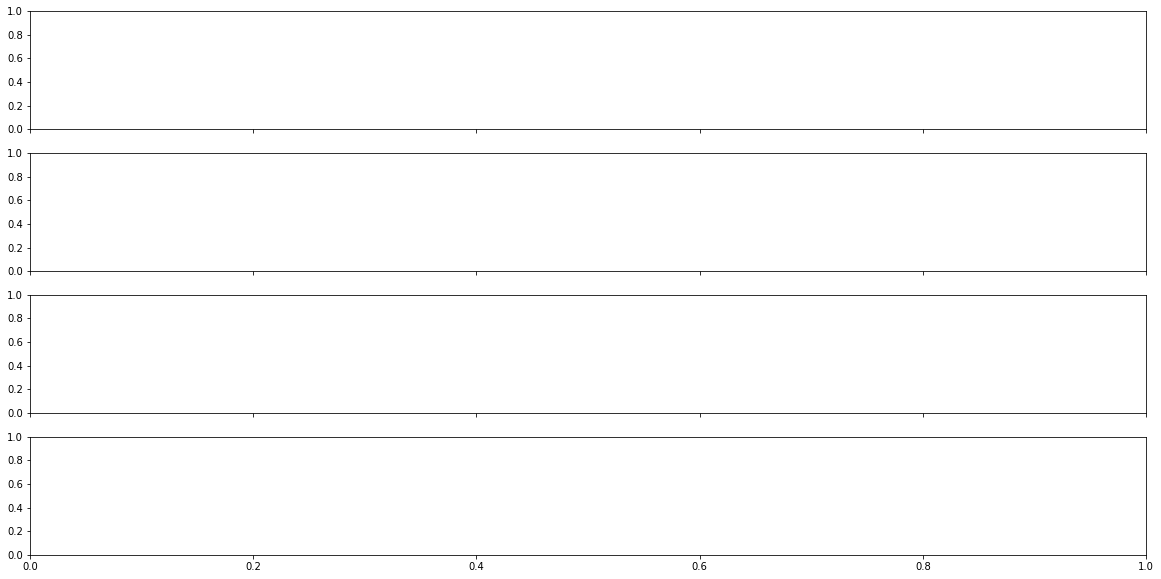

In [7]:
fig, axs = plt.subplots(4, 1, figsize=(20,10), sharex=True)

for seed in range(len(model)):
    rewards = model[seed]['dataset']['reward']
    cum_reward_list = []
    cum_reward = 0
    for rew in rewards:
        cum_reward += rew
        cum_reward_list.append(cum_reward)
    
    axs[seed].plot(cum_reward_list, label='seed_' + str(seed))
    axs[seed].legend()

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(20,14))

for seed in range(len(model)):
    bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action in model[seed]['dataset']['action']] 
    p78 = [int(action[1]) for action in bin_actions]
    p79 = [int(action[0]) for action in bin_actions]
    
    axs[seed].plot(p78)
    axs[seed].plot(p79, alpha=0.5)
    axs[seed].legend(('P78', 'P79'))
    axs[seed].set_title('TEST ' + str(seed))

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(20,15))

for seed in range(len(model)):
    T41_level = [model[seed]['dataset']['current_state'][i][2] for i in range(len(model[seed]['dataset']))]
    T42_level = [model[seed]['dataset']['current_state'][i][3] for i in range(len(model[seed]['dataset']))]
    
    axs[seed].plot(T41_level)
    axs[seed].plot(T42_level)
    
    axs[seed].legend(('T41', 'T42'))
    axs[seed].set_title('TEST ' + str(seed))

NameError: name 'model' is not defined

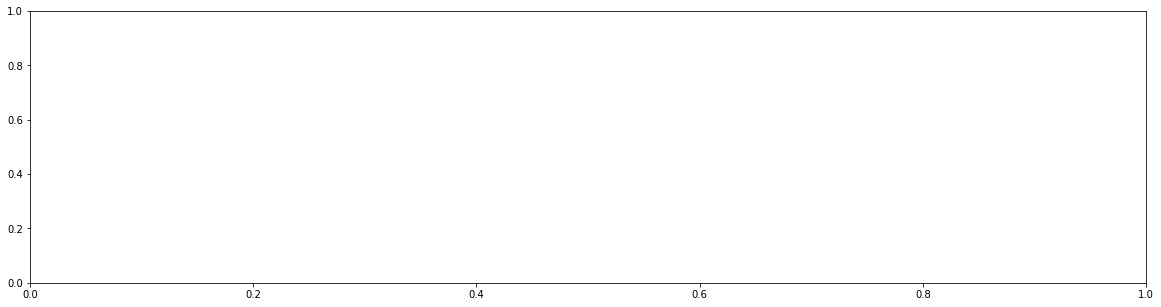

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot([model[0]['dataset']['current_state'][i][5] for i in range(len(model[0]['dataset']))])
ax.plot([model[1]['dataset']['current_state'][i][5] for i in range(len(model[1]['dataset']))])
ax.plot([model[2]['dataset']['current_state'][i][5] for i in range(len(model[2]['dataset']))])
ax.plot([model[3]['dataset']['current_state'][i][5] for i in range(len(model[3]['dataset']))])
    
ax.legend(('seed_0', 'seed_1', 'seed_2', 'seed_3'))

NameError: name 'model' is not defined

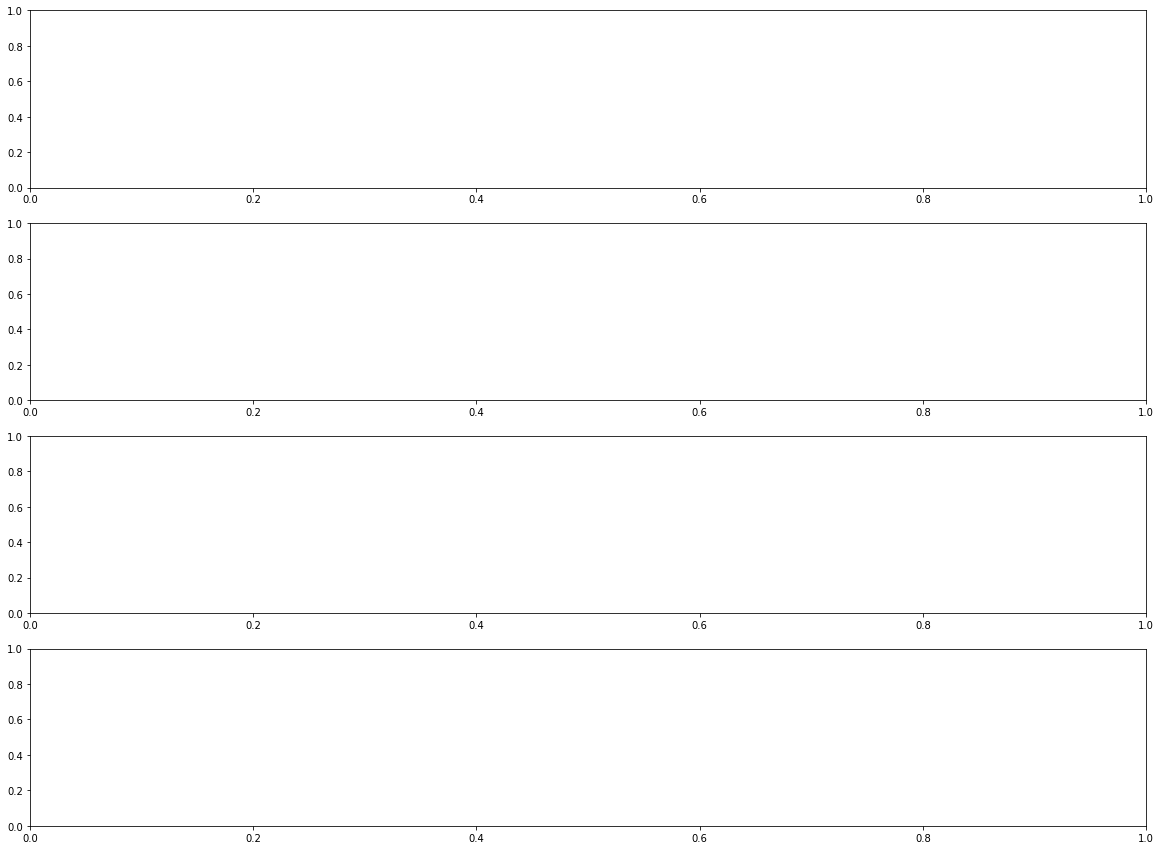

In [9]:
if what == 'attacks':
    ground_truth_dir = 'saved_variables/' + attacks_file 

    fig, axs = plt.subplots(4, 1, figsize=(20,15))

    for seed in range(len(model)):
        T41_scada = [model[seed]['dataset']['current_state'][i][2] for i in range(len(model[seed]['dataset']))]
        ground_truth_csv = ground_truth_dir + '/ground_truth' + str(seed) + '.csv'
        df_ground = pd.read_csv(ground_truth_csv)
        T41_ground_truth = df_ground['T41_LEVEL']

        axs[seed].plot(T41_scada)
        axs[seed].plot(T41_ground_truth)


        axs[seed].legend(('T41_scada', 'T41_ground_truth'))

In [ ]:
df_ground

In [575]:
def test_subplot(series, variable_names, legends, plot_colors, test_file_name, titles, xlim=None, 
                 linestyles=None, markers=None):
    sns.set_style("whitegrid")
    subplot_n_columns = 1
    
    if len(variable_names) == 1:
        subplot_n_rows = 1
    elif len(variable_names) % 2 == 0:
        subplot_n_rows = int((len(variable_names)/subplot_n_columns))
    else:    
        subplot_n_rows = int((len(variable_names)/subplot_n_columns) + 1)
    
    ticks = np.arange(0, 1008, step=144)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 'Sat \n00:00', 'Sun \n00:00']
    
    # Builds subplot grid
    f, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize = (20,12), squeeze=False, dpi=80, sharex=True)
    
    # sharex='all', sharey='all'
    
    subplot_row = 0
    subplot_column = 0
       
    for i, variable in enumerate(variable_names):
        j = 0
        for serie in series:
            if markers:                
                axes[subplot_row][subplot_column].plot(serie[variable], label=legends[j], color=plot_colors[j], 
                                                       linestyle='None', marker=markers[j])
            else:
                axes[subplot_row][subplot_column].plot(serie[variable], label=legends[j], color=plot_colors[j], 
                                                       linestyle=linestyles[j])
            j = j + 1
               
        if i== 1:
            axes[subplot_row][subplot_column].legend(loc='lower right') 
        
        axes[subplot_row][subplot_column].grid(True)
        axes[subplot_row][subplot_column].set_title(titles[i])
        #axes[subplot_row][subplot_column].set_xlabel('Iterations')
        axes[subplot_row][subplot_column].set_ylabel('water level in tank (m)')             

        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])                    
        
        if variable == 'T41_LEVEL':
            attacks_begin_line = [204, 732]
            attacks_end_line = [312, 840]
        elif variable == 'T42_LEVEL':
            attacks_begin_line = [540, 732]
            attacks_end_line = [648, 840]
        else:
            attacks_begin_line = [204, 540, 732]
            attacks_end_line = [312, 648, 840]

        #axes[subplot_row][subplot_column].axhline(y=0,linewidth=1.0, c='gray')                                
        #axes[subplot_row][subplot_column].plot([638, 648],  [0, -0.50], 'gray')
        #axes[subplot_row][subplot_column].plot([802, 792], [0, -0.50], 'gray')
        #axes[subplot_row][subplot_column].axhline(y=-0.50,xmin=attack_begin_line, xmax=attack_end_line, zorder=0, c='gray')                                
        #axes[subplot_row][subplot_column].fill_between([638,802], [0.25,0.25], alpha=0.4, color='gray')
        #axes[subplot_row][subplot_column].fill_between([638,802], [-0.3,-0.3], alpha=0.4, color='gray')
        
        #axes[subplot_row][subplot_column].plot([648, 648],  [0, 11], 'red')
        #axes[subplot_row][subplot_column].plot([792, 792],  [0, 11], 'red')
        for x in range(len(attacks_begin_line)):
            axes[subplot_row][subplot_column].axvspan(attacks_begin_line[x], attacks_end_line[x], facecolor='gray', alpha=.2)
        
        subplot_column = subplot_column + 1
        if subplot_column >= subplot_n_columns:
            subplot_column = 0
            subplot_row = subplot_row + 1       
    
    #plt.savefig(test_file_name+'.png', orientation='landscape')
    if test_file_name is not None:
        plt.savefig(test_file_name+'.pdf', orientation='landscape')
    
    #tikzplotlib.clean_figure()
    #tikzplotlib.save(file_name+'.tex')
    
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

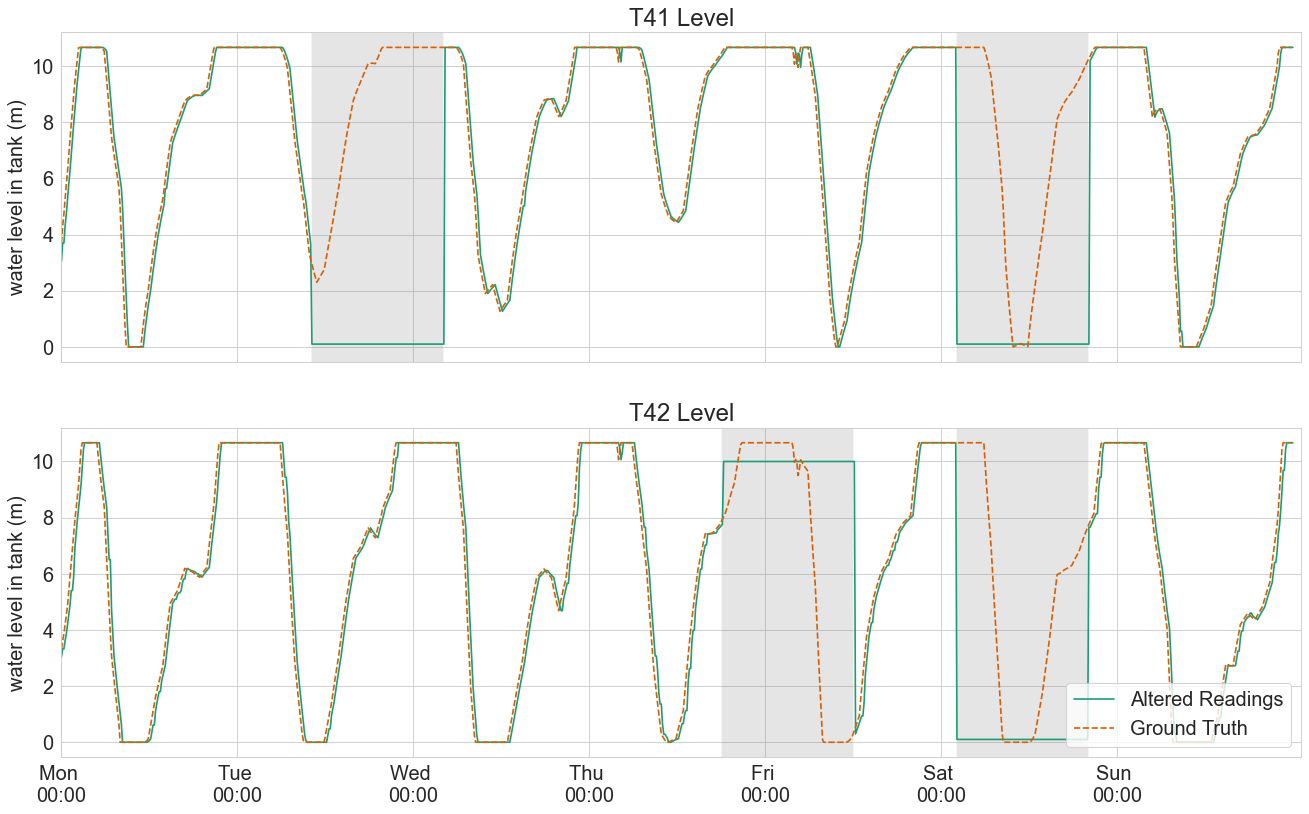

In [556]:
seed = 2
attacks_end_iteration = [312, 648, 840]

df_scada = pd.DataFrame([model[seed]['dataset']['current_state'][i][2] for i in range(len(model[seed]['dataset']))], 
                      columns=['T41_LEVEL'])
df_scada['T42_LEVEL'] = [model[seed]['dataset']['current_state'][i][3] for i in range(len(model[seed]['dataset']))]
ground_truth_csv = ground_truth_dir + '/ground_truth' + str(seed) + '.csv'
df_ground = pd.read_csv(ground_truth_csv)

######################### ###############
# Removing manually bad samples
df_scada['T42_LEVEL'][840 + 1] = df_scada['T42_LEVEL'][842]
df_scada['T42_LEVEL'][312 + 1] = df_scada['T42_LEVEL'][314]

save_pdf = True
save_as = "uninformed_tanks3"

##########################################

tanks = ['T41_LEVEL', 'T42_LEVEL']
series = [df_scada, df_ground]
colors = ['#1b9e77','#d95f02']

if save_pdf:
    file_name = save_as
else:
    file_name = None
    
title = ['T41 Level', 'T42 Level']
lines = ['solid', 'dashed']
makers = None
test_subplot(series, tanks, ['Altered Readings', 'Ground Truth'], 
             colors, file_name, title, [0,1015], lines, makers)

In [233]:
def get_change_cdf(pd, tag):      
    changes = pd[tag] != pd[tag].shift(1)
    return changes

In [234]:
def generate_change_curve(pd, tag):    
    change_series = get_change_cdf(pd, tag)
    curve = []
    activation_count = 0
    for value in change_series:
        if value:
            activation_count = activation_count + 1            
            curve.append(activation_count)
        else:
            curve.append(activation_count)            
    return curve

In [338]:
def plot_curves_cdf(tables, variables, legends, titles, cdf_file_name=None, xlim=None):
    sns.set_style("whitegrid")
    
    subplot_n_columns = 1
    
    if len(variables) == 1:
        subplot_n_rows = 1
    elif len(variables) % 2 == 0:
        subplot_n_rows = int((len(variables)/subplot_n_columns))
    else:    
        subplot_n_rows = int((len(variables)/subplot_n_columns) + 1)
    
    ticks = np.arange(0, 1008, step=144)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 
                    'Sat \n00:00', 'Sun \n00:00']
    
    fig, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize=(20,12), squeeze=False, dpi=80, sharex=True)
    
    subplot_row = 0
    subplot_column = 0
    
    for i, var in enumerate(variables):
        change_curves = []
        
        j = 0
        for table in tables:
            axes[subplot_row][subplot_column].plot(generate_change_curve(table, var), 
                                                   label=legends[j])
            j += 1
        
        axes[subplot_row][subplot_column].grid(True)        
        axes[subplot_row][subplot_column].set_title(titles[i])
        axes[subplot_row][subplot_column].set_ylabel('Number of Activations')             
        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        #axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])      
        axes[subplot_row][subplot_column].set_ylim(bottom=-1, top=25)   
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])  
        
        if i== 1:
            axes[subplot_row][subplot_column].legend(loc='lower right') 
            
        attacks_begin_line = [204, 540, 732]
        attacks_end_line = [312, 648, 840]
        
        for x in range(len(attacks_begin_line)):
            axes[subplot_row][subplot_column].axvspan(attacks_begin_line[x], attacks_end_line[x], 
                                                      facecolor='gray', alpha=.2)
        
        subplot_column = subplot_column + 1
        if subplot_column >= subplot_n_columns:
            subplot_column = 0
            subplot_row = subplot_row + 1
            
        #i = i + 1
        
    if cdf_file_name is not None:
        #plt.savefig(cdf_file_name+'.png', orientation='landscape')
        plt.savefig(cdf_file_name+'.pdf', orientation='landscape')
        
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

In [339]:
#change_curves = []    
#for i in range(0,5):
#    change_curves.append(generate_change_curve(normal_operation_runs[i], 'P78_STATUS')) 
    
#file_name = None
#plot_curves_cdf(change_curves, ['Altered Readings', 'Ground Truth'], 'P78 Activations', file_name, [0,1008])

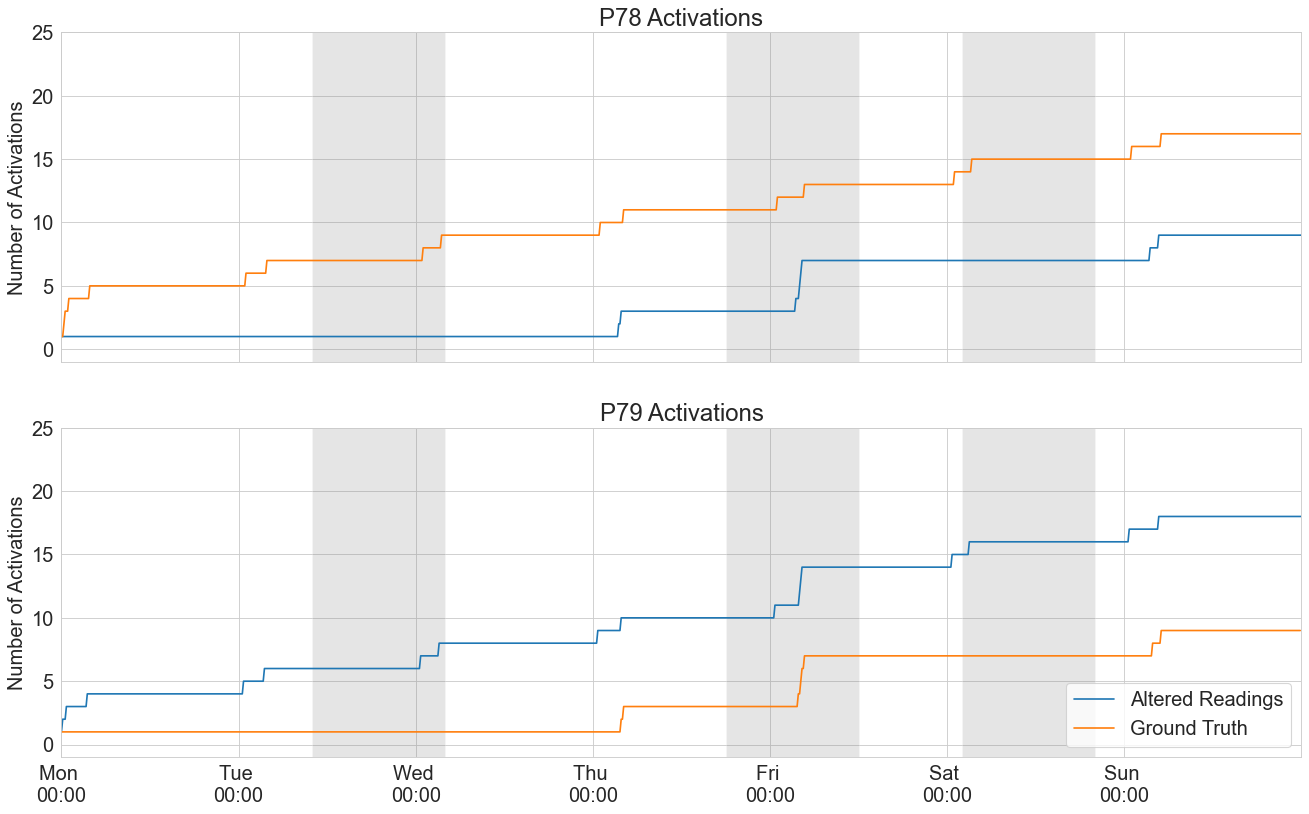

In [341]:
seed = 2
change_curves = []

bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action 
               in model[seed]['dataset']['action']] 
p78 = [int(action[1]) for action in bin_actions]
p79 = [int(action[0]) for action in bin_actions]
df_scada = pd.DataFrame(p78, columns=['P78_STATUS'])
df_scada['P79_STATUS'] = p79

ground_truth_csv = ground_truth_dir + '/ground_truth' + str(seed) + '.csv'
df_ground = pd.read_csv(ground_truth_csv)

tables = [df_scada, df_ground]
variables = ['P78_STATUS', 'P79_STATUS']
file_name = None
plot_curves_cdf(tables, variables, ['Altered Readings', 'Ground Truth'], 
                ['P78 Activations', 'P79 Activations'], file_name, [0,1008])

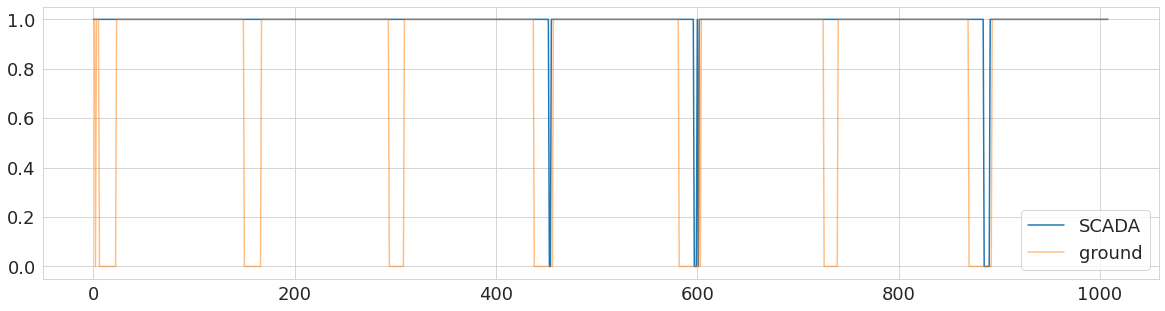

In [356]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax.plot(p78, label='SCADA')
ax.plot(df_ground['P78_STATUS'], label='ground', alpha=0.5)
ax.legend()
    

In [462]:
def normal_op_plot(series, var_groups, titles, y_labels, legends=None, colors=None, test_file_name=None, 
                   xlim=None, linestyles=None, markers=None):
    sns.set_style("whitegrid")
    subplot_n_columns = 1
    subplot_n_rows = 3
    
    lines = ['solid', 'dashed']

    ticks = np.arange(0, 1008, step=144)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 'Sat \n00:00', 'Sun \n00:00']
    
    # Builds subplot grid
    f, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize = (20,15), squeeze=False, dpi=80, sharex=True)
    
    # sharex='all', sharey='all'
    
    subplot_row = 0
    subplot_column = 0
       
    for i, variables in enumerate(var_groups):
        for j, var in enumerate(variables):
            axes[subplot_row][subplot_column].plot(series[var], label=legends[i][j], 
                                                   color=colors[i][j], linestyle=lines[j],
                                                  linewidth=2.5)
        
        if var != 'CUM_REWARD':
            axes[subplot_row][subplot_column].legend(loc='right') 
        
        axes[subplot_row][subplot_column].grid(True)
        axes[subplot_row][subplot_column].set_title(titles[i])
        #axes[subplot_row][subplot_column].set_xlabel('Iterations')
        axes[subplot_row][subplot_column].set_ylabel(y_labels[i])             

        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])                    
            
        subplot_row = subplot_row + 1       
    
    if test_file_name is not None:
        plt.savefig(test_file_name+'.pdf', orientation='landscape')
    
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

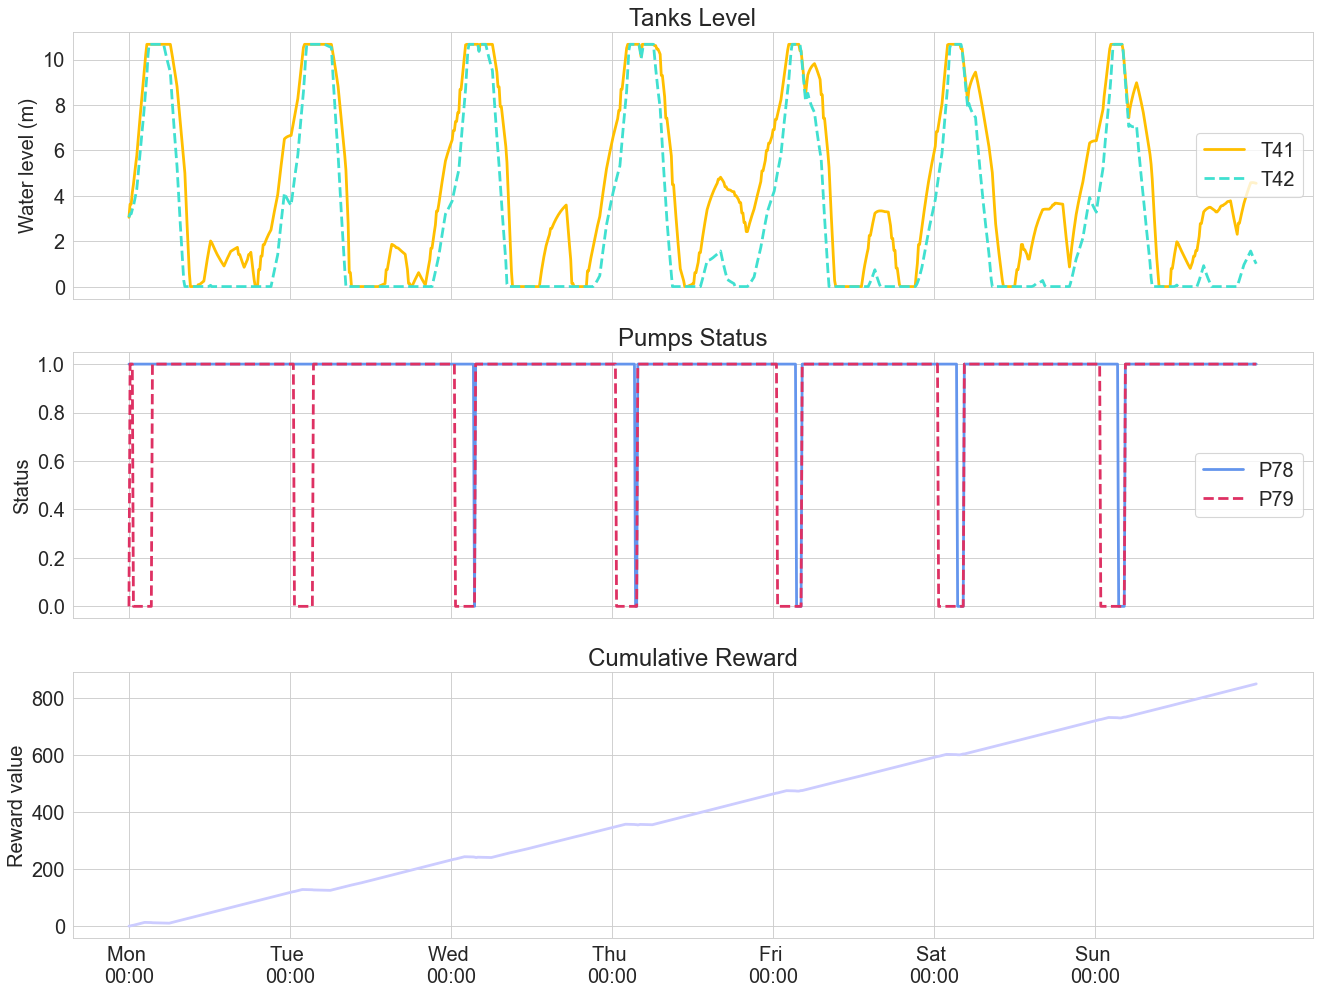

In [475]:
seed = 3

# TANKS
df = pd.DataFrame([model[seed]['dataset']['current_state'][i][2] for i in 
                   range(len(model[seed]['dataset']))], columns=['T41_LEVEL'])
df['T42_LEVEL'] = [model[seed]['dataset']['current_state'][i][3] for i in 
                   range(len(model[seed]['dataset']))]

# PUMPS
bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action 
               in model[seed]['dataset']['action']] 
p78 = [int(action[1]) for action in bin_actions]
p79 = [int(action[0]) for action in bin_actions]
df['P78_STATUS'] = p78
df['P79_STATUS'] = p79

# CUMULATIVE REWARD
rewards = model[seed]['dataset']['reward']
cum_reward_list = []
cum_reward = 0
for rew in rewards:
    cum_reward += rew
    cum_reward_list.append(cum_reward)
df['CUM_REWARD'] = cum_reward_list

######################### ###############

# Saving manually 
save_pdf = True
save_as = "uninformed_normal3"

##########################################

var_groups  = [['T41_LEVEL', 'T42_LEVEL'], ['P78_STATUS', 'P79_STATUS'], ['CUM_REWARD']]
series = df
colors = [['#FFBF00', '#40E0D0'], ['#6495ED', '#DE3163'],  ['#CCCCFF']]
var_labels  = [['T41', 'T42'], ['P78', 'P79'], ['Reward']]
y_labels  = ['Water level (m)', 'Status', 'Reward value']

if save_pdf:
    file_name = save_as
else:
    file_name = None
    
titles = ['Tanks Level', 'Pumps Status', 'Cumulative Reward']
lines = ['solid', 'dashed']
makers = None
normal_op_plot(series, var_groups=var_groups, titles=titles, 
               y_labels=y_labels, legends=var_labels, colors=colors,
               test_file_name=file_name)

In [636]:
def attacks_plot(series, var_groups, titles, y_labels, legends=None, colors=None, 
                 test_file_name=None, xlim=None, linestyles=None, markers=None):
    sns.set_style("whitegrid")
    subplot_n_columns = 1
    subplot_n_rows = 4
    
    lines = ['solid', 'dashed']

    ticks = np.arange(0, 1008, step=144)
    ticks_labels = ['Mon \n00:00', 'Tue \n00:00', 'Wed \n00:00', 'Thu \n00:00', 'Fri \n00:00', 'Sat \n00:00', 'Sun \n00:00']
    
    # Builds subplot grid
    f, axes = plt.subplots(subplot_n_rows,subplot_n_columns, figsize = (20,18), squeeze=False, dpi=80, sharex=True)
    
    # sharex='all', sharey='all'
    
    subplot_row = 0
    subplot_column = 0
       
    for i, variables in enumerate(var_groups):
        for j, var in enumerate(variables):
            axes[subplot_row][subplot_column].plot(series[var], label=legends[i][j], 
                                                   color=colors[i][j], linestyle=lines[j],
                                                   linewidth=2.5)
        
        if var != 'CUM_REWARD':
            axes[subplot_row][subplot_column].legend(loc='right') 
        
        axes[subplot_row][subplot_column].grid(True)
        axes[subplot_row][subplot_column].set_title(titles[i])
        #axes[subplot_row][subplot_column].set_xlabel('Iterations')
        axes[subplot_row][subplot_column].set_ylabel(y_labels[i])             

        axes[subplot_row][subplot_column].set_xticks(ticks)
        axes[subplot_row][subplot_column].set_xticklabels(ticks_labels)
        
        if xlim:
            axes[subplot_row][subplot_column].set_xlim(left=xlim[0], right=xlim[1])   
            
        if i == 0:
            attacks_begin_line = [204, 732]
            attacks_end_line = [312, 840]
        elif i == 1:
            attacks_begin_line = [540, 732]
            attacks_end_line = [648, 840]
        else:
            attacks_begin_line = [204, 540, 732]
            attacks_end_line = [312, 648, 840]
            
        for x in range(len(attacks_begin_line)):
            axes[subplot_row][subplot_column].axvspan(
                attacks_begin_line[x],attacks_end_line[x], facecolor='lightgray', alpha=0.3)
        
        subplot_row = subplot_row + 1       
    
    if test_file_name is not None:
        plt.savefig(test_file_name+'.pdf', orientation='landscape')
    
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    plt.rc('font', **font)    

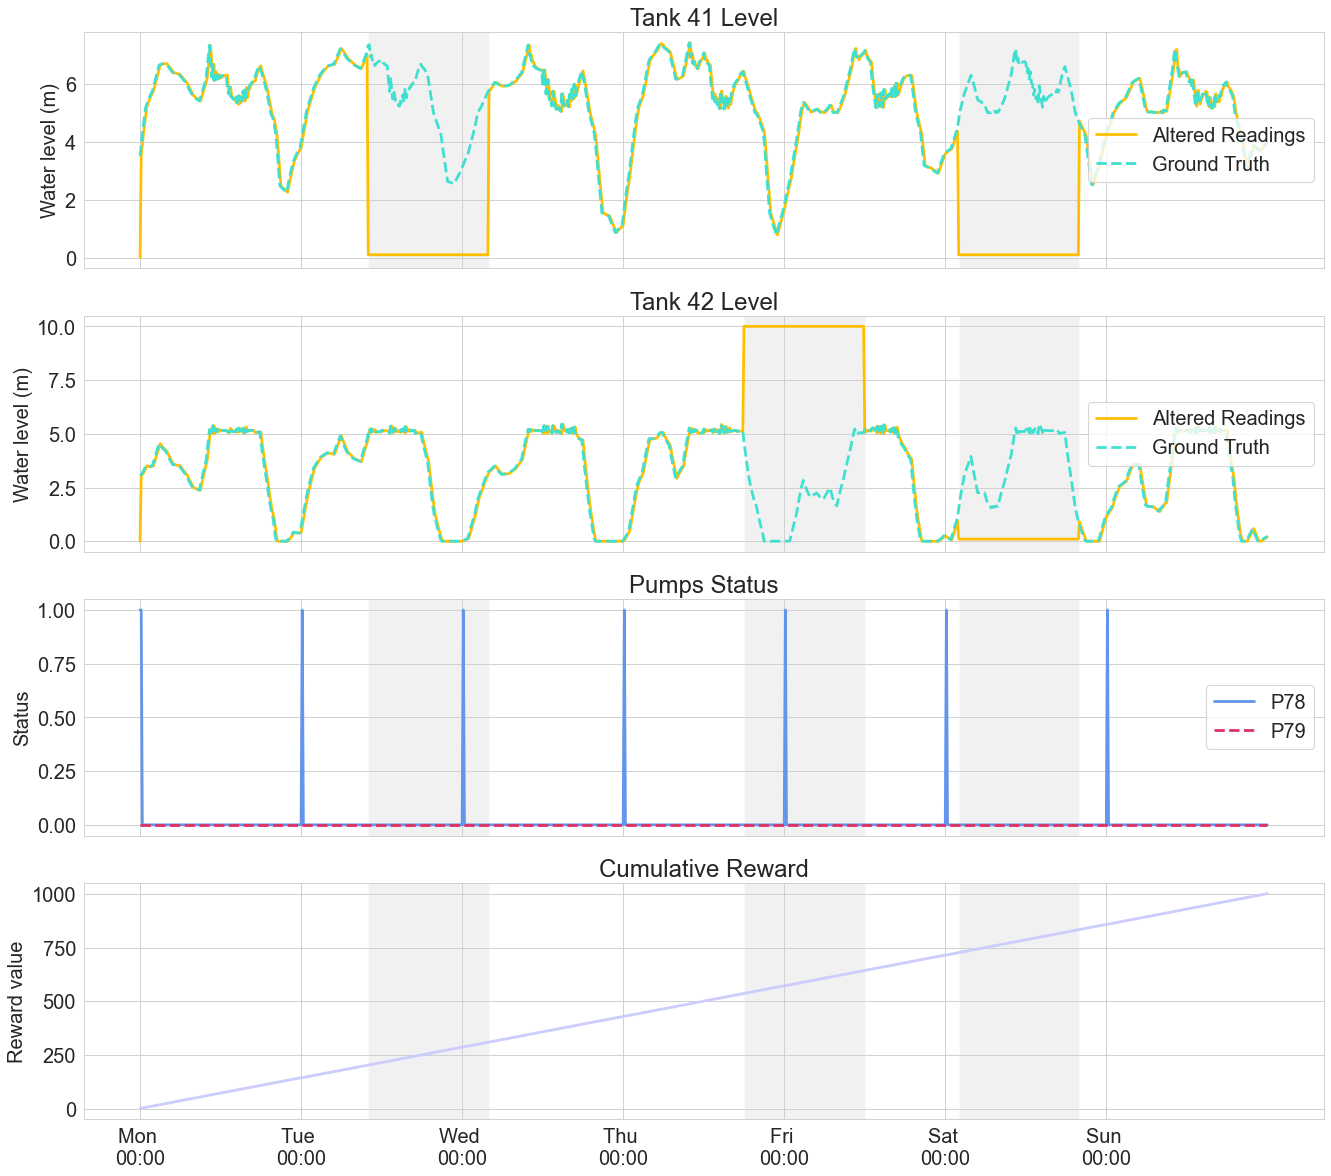

In [640]:
seed = 2

# TANKS
df = pd.DataFrame([model[seed]['dataset']['current_state'][i][2] for i in 
                   range(len(model[seed]['dataset']))], columns=['T41_LEVEL'])
df['T42_LEVEL'] = [model[seed]['dataset']['current_state'][i][3] for i in 
                   range(len(model[seed]['dataset']))]

# GROUND
#ground_truth_csv = ground_truth_dir + '/ground_truth' + str(seed) + '.csv'
#df_ground = pd.read_csv(ground_truth_csv)
#df['T41_GROUND'] = df_ground["T41_LEVEL"]
#df['T42_GROUND'] = df_ground["T42_LEVEL"]

df['T41_GROUND'] = model[seed]["T41_ground"][1:]
df['T42_GROUND'] = model[seed]["T42_ground"][1:]

# PUMPS
bin_actions = ['{0:0{width}b}'.format(action[0], width=2) for action 
               in model[seed]['dataset']['action']] 
p78 = [int(action[1]) for action in bin_actions]
p79 = [int(action[0]) for action in bin_actions]
df['P78_STATUS'] = p78
df['P79_STATUS'] = p79

# CUMULATIVE REWARD
rewards = model[seed]['dataset']['reward']
cum_reward_list = []
cum_reward = 0
for rew in rewards:
    cum_reward += rew
    cum_reward_list.append(cum_reward)
df['CUM_REWARD'] = cum_reward_list

######################### ###############

# Saving manually 
#df['T42_LEVEL'][840 + 1] = df['T42_LEVEL'][842]
#df['T42_LEVEL'][312 + 1] = df['T42_LEVEL'][314]


save_pdf = False
save_as = "informed_attack3"

##########################################

var_groups  = [['T41_LEVEL', 'T41_GROUND'], ['T42_LEVEL', 'T42_GROUND'], ['P78_STATUS', 'P79_STATUS'], ['CUM_REWARD']]
series = df
colors = [['#FFBF00', '#40E0D0'], ['#FFBF00', '#40E0D0'], ['#6495ED', '#DE3163'],  ['#CCCCFF']]
var_labels  = [['Altered Readings', 'Ground Truth'], ['Altered Readings', 'Ground Truth'],
               ['P78', 'P79'], ['Reward']]
y_labels  = ['Water level (m)', 'Water level (m)', 'Status', 'Reward value']

if save_pdf:
    file_name = save_as
else:
    file_name = None
    
titles = ['Tank 41 Level', 'Tank 42 Level', 'Pumps Status', 'Cumulative Reward']
lines = ['solid', 'dashed']
makers = None
attacks_plot(series, var_groups=var_groups, titles=titles, 
               y_labels=y_labels, legends=var_labels, colors=colors,
               test_file_name=file_name)

In [577]:
df[]

[0,
 3.939971284701984,
 4.799379729914509,
 5.630281049489005,
 6.331461533109716,
 7.011118733361833,
 7.670329848851958,
 8.307805535010836,
 8.92675339931022,
 8.928131326023824,
 8.623297142811511,
 8.382332398691968,
 8.205169657672466,
 7.9918803767578614,
 7.968151940715946,
 8.063663176121493,
 8.064691661312448,
 8.092971209961767,
 8.097710293700015,
 8.111486469895464,
 8.049627147497079,
 8.035234533418535,
 8.023823379437076,
 8.020774198062998,
 8.018409087825383,
 8.026429817833641,
 7.992778769457869,
 7.987593827609703,
 7.983736048883688,
 7.983087532767307,
 7.982616215678072,
 7.958520666471527,
 8.03144633167963,
 8.033875643935852,
 8.05159686230555,
 8.05507478453902,
 8.059096811740659,
 8.064633585207512,
 8.041657221811862,
 8.03637948378362,
 8.032187527925883,
 8.029983677305157,
 8.029439577959174,
 8.039255677444842,
 7.995696816149624,
 7.9887450002394695,
 7.983548543601285,
 7.983054436783366,
 7.9814892575757,
 7.970304778560071,
 8.003952543913844,
 